Utilizado o modelo pré-treinado [GloVe](https://nlp.stanford.edu/projects/glove/) e utilizar o texto abaixo para PCA.

"O cachorro late para o gato."

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pickle


In [ ]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

In [ ]:
!unzip glove.6B.zip

Agora, transformamos o texto em uma representação vetorial somando os vetores a cada palavra do texto.

In [27]:
def load_glove_model(file_path):
    with open(file_path, 'rb') as f:
        model = {}
        for line in f:
            values = line.split()
            word = values[0].decode('utf-8')
            coefs = np.asarray(values[1:], dtype='float32')
            model[word] = coefs
    return model

modelo_glove = load_glove_model('glove.6B.100d.txt')
#print(modelo_glove)


In [29]:
texto = "O cachorro late para o gato."
palavras = texto.split()
vetores = np.zeros((len(palavras), 100))

for i, palavra in enumerate(palavras):
    if palavra in modelo_glove:
        vetores[i, :] = modelo_glove[palavra]
    else:
        vetores[i, :] = np.zeros(100)
    
texto_vetorial = np.mean(vetores, axis=0)


Gerar gráfico PCA

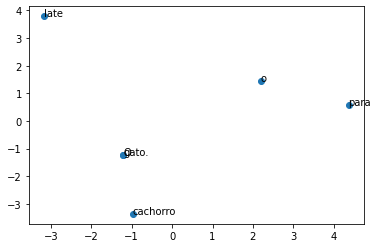

In [30]:
pca = PCA(n_components=2)
texto_vetorial_reduzido = pca.fit_transform(vetores)

plt.scatter(texto_vetorial_reduzido[:, 0], texto_vetorial_reduzido[:, 1])

for i, palavra in enumerate(palavras):
    plt.annotate(palavra, (texto_vetorial_reduzido[i, 0], texto_vetorial_reduzido[i, 1]))

plt.show()
